In [76]:
from __future__ import print_function
import numpy as np
from numpy import dot
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [77]:
def prepend_one(X):
    """prepend a one vector to X."""
    return np.column_stack([np.ones(X.shape[0]), X])
# X=np.random.rand(3,3)
# X=prepend_one(X)
# print(X)

In [78]:
def grid2d(start, end, num=50):
    """Create an 2D array where each row is a 2D coordinate.
    np.meshgrid is pretty annoying!
    """
    dom = np.linspace(start, end, num)
    print(dom.shape)
    X0, X1 = np.meshgrid(dom, dom)
#     print(X0.shape)
#     print(X1)
    return np.column_stack([X0.flatten(), X1.flatten()])

In [79]:
# X=grid2d(1,100,num=50)
# X=prepend_one(X)
# X



In [80]:
# load the data
data = np.loadtxt("https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/data/dataLinReg2D.txt")
#data =np.loadtxt("https://ipvs.informatik.uni-stuttgart.de/mlr/marc/teaching/data/dataQuadReg2D.txt")
print("data.shape:", data.shape)

data.shape: (100, 3)


In [81]:
X, y = data[:, :2], data[:, 2]
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (100, 2)
y.shape: (100,)


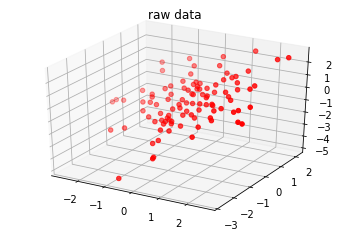

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection arg is important!
ax.scatter(X[:, 0], X[:, 1], y, color="red")
ax.set_title("raw data")
plt.draw()

In [83]:
X = prepend_one(X)
print("X.shape:", X.shape)

X.shape: (100, 3)


In [84]:
beta_ = mdot([inv(dot(X.T, X)), X.T, y])
print("Optimal beta:", beta_)

Optimal beta: [-0.67806079  0.2451943   1.37054629]


In [85]:
X_grid = prepend_one(grid2d(-3, 3, num=30))#testset data
print("X_grid.shape:", X_grid.shape)

(30,)
X_grid.shape: (900, 3)


In [86]:
#grid2d(-3, 3, num=30)

In [87]:
y_grid = dot(X_grid, beta_)
print("Y_grid.shape", y_grid.shape)

Y_grid.shape (900,)


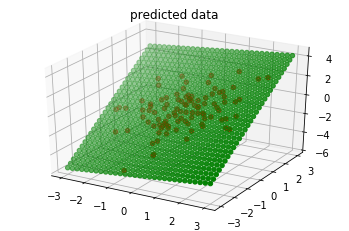

In [88]:
# vis the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # the projection part is important
ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid,color='green') # dont use the 1 infront
ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
ax.set_title("predicted data")
plt.show()

In [89]:
# # print(X.shape)
# # print(X_grid.shape)
# # dot(X,beta_ridge)
# I=np.eye(3)
# I[0,0]=0
# # I
# lamb=10
# beta_ridge = mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
# sum=0
# for i in range(X.shape[1]):
#     sum+=(y[i]-dot(X[i].T,beta_ridge))**2
    
# print(sum)
X.shape[1]

3

Lambda=  0.0001
(3, 3)
Optimal beta ridge: [-0.67806065  0.24519437  1.37054447]
Y_grid.shape (900,)
squared_error=  1.0247981456179824


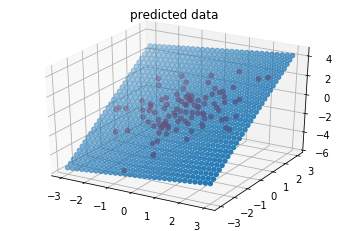

Lambda=  0.001
(3, 3)
Optimal beta ridge: [-0.67805942  0.24519506  1.37052806]
Y_grid.shape (900,)
squared_error=  1.024798170166296


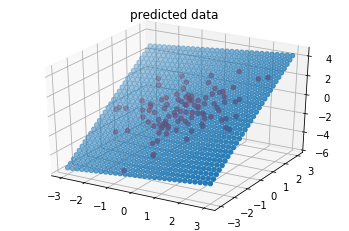

Lambda=  0.01
(3, 3)
Optimal beta ridge: [-0.67804714  0.24520197  1.37036402]
Y_grid.shape (900,)
squared_error=  1.0248006243991679


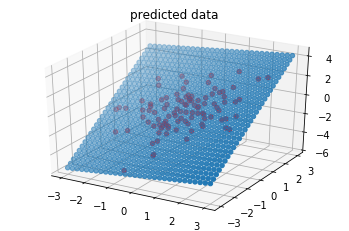

Lambda=  0.1
(3, 3)
Optimal beta ridge: [-0.6779244   0.24527061  1.36872579]
Y_grid.shape (900,)
squared_error=  1.0250454503878297


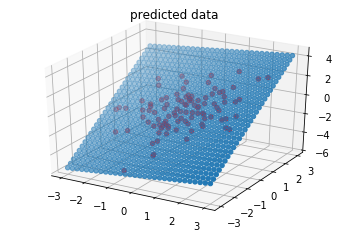

Lambda=  1.0
(3, 3)
Optimal beta ridge: [-0.67670904  0.24591906  1.35256349]
Y_grid.shape (900,)
squared_error=  1.0489428036822437


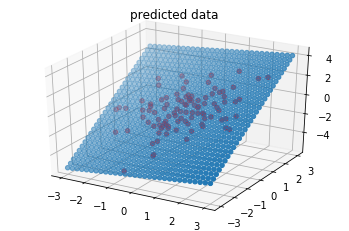

Lambda=  10.0
(3, 3)
Optimal beta ridge: [-0.66563729  0.24926169  1.21023712]
Y_grid.shape (900,)
squared_error=  2.954780774689268


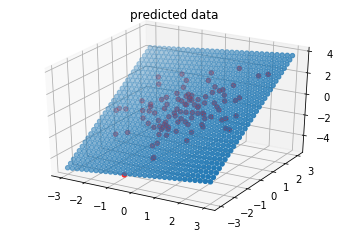

Lambda=  100.0
(3, 3)
Optimal beta ridge: [-0.60807865  0.2007656   0.59642026]
Y_grid.shape (900,)
squared_error=  48.08721867099993


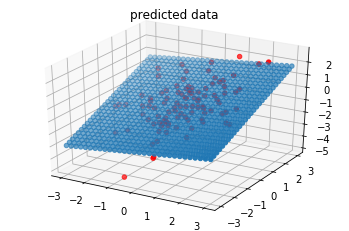

Lambda=  1000.0
(3, 3)
Optimal beta ridge: [-0.54391567  0.04848157  0.10019273]
Y_grid.shape (900,)
squared_error=  137.8419338514632


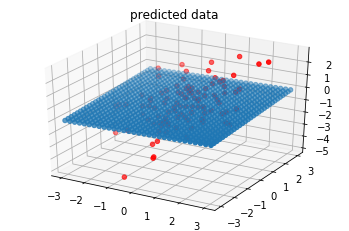

Lambda=  10000.0
(3, 3)
Optimal beta ridge: [-0.52993954  0.00555433  0.01077896]
Y_grid.shape (900,)
squared_error=  160.90391553940418


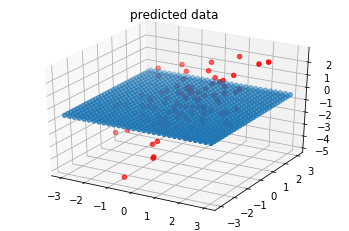

Lambda=  100000.0
(3, 3)
Optimal beta ridge: [-0.52837188  0.00056351  0.00108619]
Y_grid.shape (900,)
squared_error=  163.55996032210678


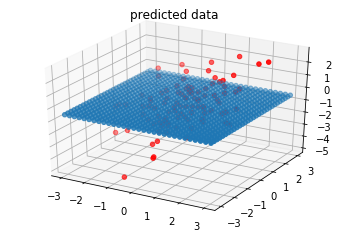

Lambda=  1000000.0
(3, 3)
Optimal beta ridge: [-5.28213203e-01  5.64330368e-05  1.08703169e-04]
Y_grid.shape (900,)
squared_error=  163.82958151799858


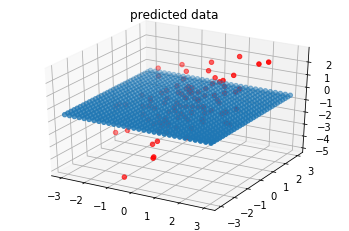

Lambda=  10000000.0
(3, 3)
Optimal beta ridge: [-5.28197316e-01  5.64412427e-06  1.08711553e-05]
Y_grid.shape (900,)
squared_error=  163.85658440000856


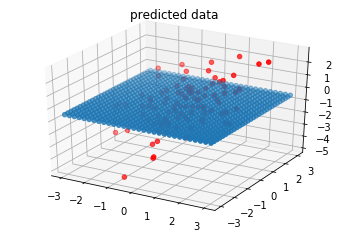

In [90]:
##Ridge reg.

lamb=0.0001
while lamb<=10000000:
    print("Lambda= ",lamb)
    error=0
    beta_sqr=0
    I=np.eye(X.shape[1])
    print(I.shape)
    I[0,0]=0 # beta_1 i.e. intercept is not regularised
    beta_ridge = mdot([inv(dot(X.T, X)+lamb*I), X.T, y])
    print("Optimal beta ridge:", beta_ridge)
    #error=(y-dot(X,beta_ridge))
    
    for i in range(X.shape[0]):
        error+=(y[i]-dot(X[i].T,beta_ridge))**2
    for j in range(1,len(beta_ridge)):
        
        beta_sqr+=beta_ridge[j]**2
        
    y_grid = dot(X_grid, beta_ridge)
    print("Y_grid.shape", y_grid.shape)
    squared_error=error#+lamb*beta_sqr 
    print("squared_error= ",squared_error)
    lamb=lamb*10
    # vis the result
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # the projection part is important
    ax.scatter(X_grid[:, 1], X_grid[:, 2], y_grid) # dont use the 1 infront
    ax.scatter(X[:, 1], X[:, 2], y, color="red") # also show the real data
    ax.set_title("predicted data")
    plt.show()

In [91]:
# k=5
# d=np.split(X,k)
# c=np.split(y,k)
# beta=list()

In [92]:
# for lamb in range(0,10000,100):
#     print("Lambda= ",lamb)
#     I=np.eye(X.shape[1])
#     print(I.shape)
#     for i in range(k):
#         beta.append(mdot([inv(dot(d[i].T, d[i])+lamb*I), d[i].T, c[i]]))
        

In [93]:
#len(beta_ridge)#.shape

In [94]:
#p=dot((X[0].T),beta_ridge)

In [95]:
#p

In [96]:
#y


In [97]:
#beta_ridge